# QRSM Convergence Study

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import QuadraticAnalysisToolkit as QAT
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Info to set up analysis
lo = [0.01, 0.3]
hi = [0.1, 0.9]
ndim = 2
csvfile = 'output2.csv'
csvdelimiter = ','
skipheader = 1
nensemble = 6

In [3]:
# Open the csv file in a Grid object
fullgrid = QAT.Grid()
fullgrid.initFromCSV(csvfile, delimiter=csvdelimiter, skip_header=skipheader)

## Elliptical Optimization

### Convergence With No Repeated Samples

In [4]:
quadratic_analyses = []

pointlist = fullgrid.points[:]
success = True

# Select the first 6, then 12, etc points from the full grid
# and do separate quadratic analyses on them. Warn on error.
for i in [6, 12, 24, 48, 72]:
    ipts  = [pointlist.pop(0) for j in range(i)]
    igrid = QAT.Grid(ipts)
    iqa   = QAT.QuadraticAnalysis(igrid, lo, hi)
    success = success and iqa.success
    if not success:
        write('ERROR: subsampling analyis failed with {} points!'.format(i))
        break
    else:
        quadratic_analyses.append(iqa)

/home/dwillcox/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/dwillcox/codes/StarSTRUQ/UQ-mesa/QuadraticAnalysisToolkit.py:500: RuntimeWarning: divide by zero encountered in true_divide
  f += hp**2 / (4. * (mup + x)**2)
/home/dwillcox/codes/StarSTRUQ/UQ-mesa/QuadraticAnalysisToolkit.py:500: RuntimeWarning: divide by zero encountered in double_scalars
  f += hp**2 / (4. * (mup + x)**2)


In [5]:
# Collect each inner and outer max/mins
independent_elliptical_num_points = []
independent_elliptical_inner_maxs = []
independent_elliptical_inner_mins = []
independent_elliptical_outer_maxs = []
independent_elliptical_outer_mins = []
for qa in quadratic_analyses:
    independent_elliptical_num_points.append(len(qa.grid.points))
    independent_elliptical_inner_maxs.append(qa.eopt.inner_max)
    independent_elliptical_inner_mins.append(qa.eopt.inner_min)
    independent_elliptical_outer_maxs.append(qa.eopt.outer_max)
    independent_elliptical_outer_mins.append(qa.eopt.outer_min)

/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/dwillcox/anaconda3/lib/python3.6/site

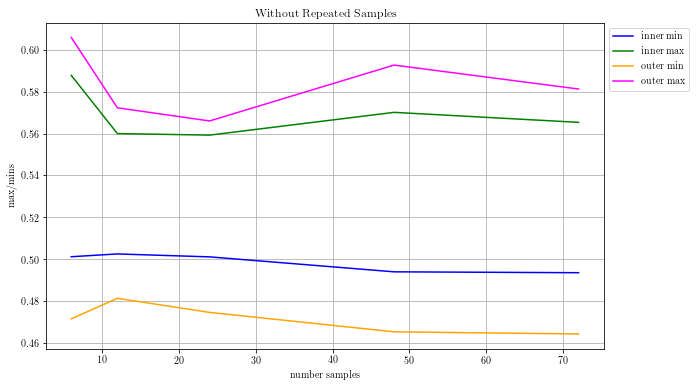

In [6]:
fig, ax = plt.subplots()
ax.plot(independent_elliptical_num_points, independent_elliptical_inner_mins, color='blue', label='inner min')
ax.plot(independent_elliptical_num_points, independent_elliptical_inner_maxs, color='green', label='inner max')
ax.plot(independent_elliptical_num_points, independent_elliptical_outer_mins, color='orange', label='outer min')
ax.plot(independent_elliptical_num_points, independent_elliptical_outer_maxs, color='magenta', label='outer max')
ax.set_xlabel('number samples')
ax.set_ylabel('max/mins')
plt.title('Without Repeated Samples')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')
ax.grid('on')
plt.savefig('convergence_without_repeats_ellipses.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)

### Convergence With Repeated Samples

In [7]:
quadratic_analyses = []

pointlist = fullgrid.points[:]
success = True

# Select the first 6, then 7, 8, ... etc points from the full grid
# and do separate quadratic analyses on them. Warn on error.
for i in range(6, len(pointlist)):
    ipts  = pointlist[:i]
    igrid = QAT.Grid(ipts)
    iqa   = QAT.QuadraticAnalysis(igrid, lo, hi)
    success = success and iqa.success
    if not success:
        write('ERROR: subsampling analyis failed with {} points!'.format(i))
        break
    else:
        quadratic_analyses.append(iqa)

/home/dwillcox/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/dwillcox/codes/StarSTRUQ/UQ-mesa/QuadraticAnalysisToolkit.py:500: RuntimeWarning: divide by zero encountered in true_divide
  f += hp**2 / (4. * (mup + x)**2)
/home/dwillcox/codes/StarSTRUQ/UQ-mesa/QuadraticAnalysisToolkit.py:500: RuntimeWarning: divide by zero encountered in double_scalars
  f += hp**2 / (4. * (mup + x)**2)


In [8]:
# Collect each inner and outer max/mins
repeated_elliptical_num_points = []
repeated_elliptical_inner_maxs = []
repeated_elliptical_inner_mins = []
repeated_elliptical_outer_maxs = []
repeated_elliptical_outer_mins = []
for qa in quadratic_analyses:
    repeated_elliptical_num_points.append(len(qa.grid.points))
    repeated_elliptical_inner_maxs.append(qa.eopt.inner_max)
    repeated_elliptical_inner_mins.append(qa.eopt.inner_min)
    repeated_elliptical_outer_maxs.append(qa.eopt.outer_max)
    repeated_elliptical_outer_mins.append(qa.eopt.outer_min)

/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


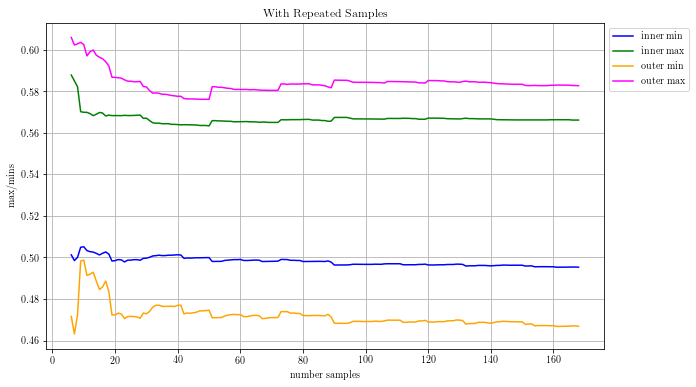

In [9]:
fig, ax = plt.subplots()
ax.plot(repeated_elliptical_num_points, repeated_elliptical_inner_mins, color='blue', label='inner min')
ax.plot(repeated_elliptical_num_points, repeated_elliptical_inner_maxs, color='green', label='inner max')
ax.plot(repeated_elliptical_num_points, repeated_elliptical_outer_mins, color='orange', label='outer min')
ax.plot(repeated_elliptical_num_points, repeated_elliptical_outer_maxs, color='magenta', label='outer max')
ax.set_xlabel('number samples')
ax.set_ylabel('max/mins')
plt.title('With Repeated Samples')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')
ax.grid('on')
plt.savefig('convergence_with_repeats_ellipses.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)

## Rectangular Optimization

### Convergence With No Repeated Samples

In [10]:
quadratic_analyses = []

pointlist = fullgrid.points[:]
success = True

# Select the first 6, then 12, etc points from the full grid
# and do separate quadratic analyses on them. Warn on error.
for i in [6, 12, 24, 48, 72]:
    ipts  = [pointlist.pop(0) for j in range(i)]
    igrid = QAT.Grid(ipts)
    iqa   = QAT.QuadraticAnalysis(igrid, lo, hi, method='rectangular')
    success = success and iqa.success
    if not success:
        write('ERROR: subsampling analyis failed with {} points!'.format(i))
        break
    else:
        quadratic_analyses.append(iqa)

/home/dwillcox/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [11]:
# Collect each max/min
independent_rectangular_num_points = []
independent_rectangular_maxs = []
independent_rectangular_mins = []
for qa in quadratic_analyses:
    independent_rectangular_num_points.append(len(qa.grid.points))
    independent_rectangular_maxs.append(qa.ropt.max_function)
    independent_rectangular_mins.append(qa.ropt.min_function)

/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


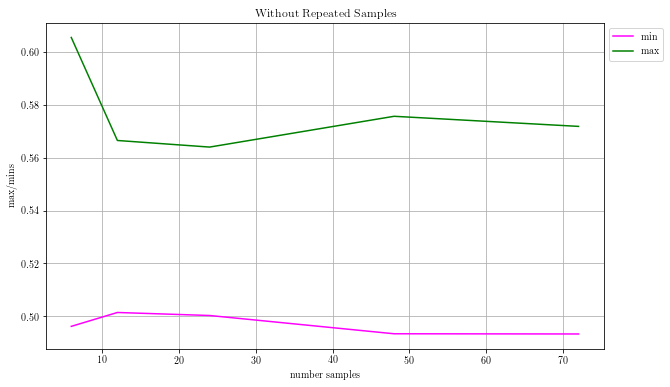

In [12]:
fig, ax = plt.subplots()
ax.plot(independent_rectangular_num_points, independent_rectangular_mins, color='magenta', label='min')
ax.plot(independent_rectangular_num_points, independent_rectangular_maxs, color='green', label='max')
ax.set_xlabel('number samples')
ax.set_ylabel('max/mins')
plt.title('Without Repeated Samples')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')
ax.grid('on')
plt.savefig('convergence_without_repeats_rectangular.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)

### Convergence With Repeated Samples

In [13]:
quadratic_analyses = []

pointlist = fullgrid.points[:]
success = True

# Select the first 6, then 7, 8, ... etc points from the full grid
# and do separate quadratic analyses on them. Warn on error.
for i in range(6, len(pointlist)):
    ipts  = pointlist[:i]
    igrid = QAT.Grid(ipts)
    iqa   = QAT.QuadraticAnalysis(igrid, lo, hi, method='rectangular')
    success = success and iqa.success
    if not success:
        write('ERROR: subsampling analyis failed with {} points!'.format(i))
        break
    else:
        quadratic_analyses.append(iqa)

/home/dwillcox/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [14]:
# Collect each max/min
repeated_rectangular_num_points = []
repeated_rectangular_maxs = []
repeated_rectangular_mins = []
for qa in quadratic_analyses:
    repeated_rectangular_num_points.append(len(qa.grid.points))
    repeated_rectangular_maxs.append(qa.ropt.max_function)
    repeated_rectangular_mins.append(qa.ropt.min_function)

/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


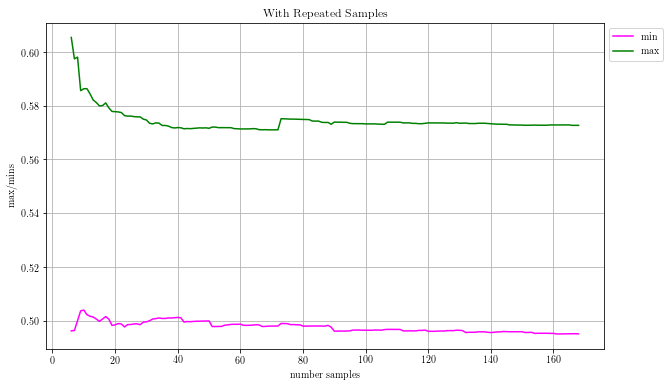

In [15]:
fig, ax = plt.subplots()
ax.plot(repeated_rectangular_num_points, repeated_rectangular_mins, color='magenta', label='min')
ax.plot(repeated_rectangular_num_points, repeated_rectangular_maxs, color='green', label='max')
ax.set_xlabel('number samples')
ax.set_ylabel('max/mins')
plt.title('With Repeated Samples')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')
ax.grid('on')
plt.savefig('convergence_with_repeats_rectangular.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)

## Combined Plots

### With No Repeated Samples

/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/dwillcox/anaconda3/lib/python3.6/site

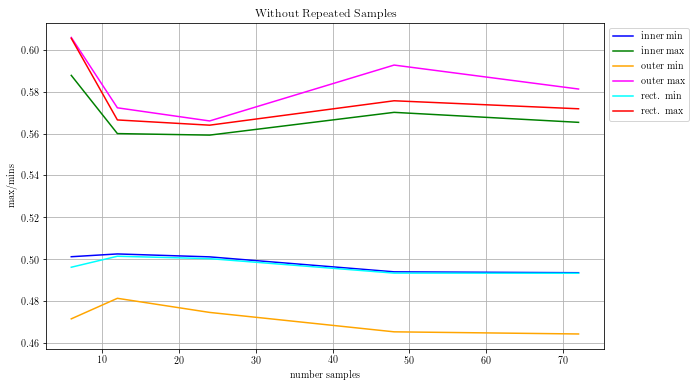

In [16]:
fig, ax = plt.subplots()
ax.plot(independent_elliptical_num_points, independent_elliptical_inner_mins, color='blue', label='inner min')
ax.plot(independent_elliptical_num_points, independent_elliptical_inner_maxs, color='green', label='inner max')
ax.plot(independent_elliptical_num_points, independent_elliptical_outer_mins, color='orange', label='outer min')
ax.plot(independent_elliptical_num_points, independent_elliptical_outer_maxs, color='magenta', label='outer max')
ax.plot(independent_rectangular_num_points, independent_rectangular_mins, color='cyan', label='rect. min')
ax.plot(independent_rectangular_num_points, independent_rectangular_maxs, color='red', label='rect. max')
ax.set_xlabel('number samples')
ax.set_ylabel('max/mins')
plt.title('Without Repeated Samples')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')
ax.grid('on')
plt.savefig('convergence_without_repeats_combined.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)

### With Repeated Samples

/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


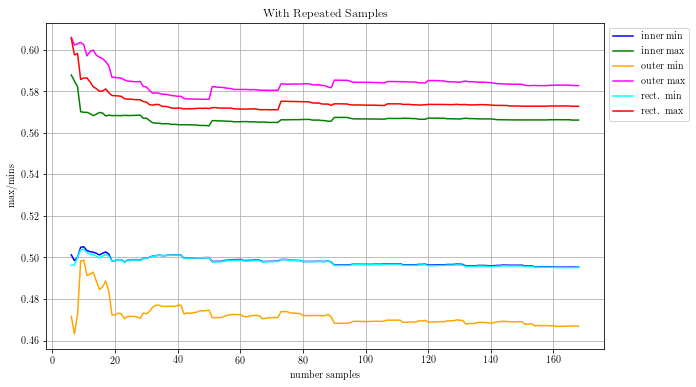

In [17]:
fig, ax = plt.subplots()
ax.plot(repeated_elliptical_num_points, repeated_elliptical_inner_mins, color='blue', label='inner min')
ax.plot(repeated_elliptical_num_points, repeated_elliptical_inner_maxs, color='green', label='inner max')
ax.plot(repeated_elliptical_num_points, repeated_elliptical_outer_mins, color='orange', label='outer min')
ax.plot(repeated_elliptical_num_points, repeated_elliptical_outer_maxs, color='magenta', label='outer max')
ax.plot(repeated_rectangular_num_points, repeated_rectangular_mins, color='cyan', label='rect. min')
ax.plot(repeated_rectangular_num_points, repeated_rectangular_maxs, color='red', label='rect. max')
ax.set_xlabel('number samples')
ax.set_ylabel('max/mins')
plt.title('With Repeated Samples')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')
ax.grid('on')
plt.savefig('convergence_with_repeats_combined.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)